In [ ]:
#Импортирование библиотек
from Timage import Timage
import numpy as np
import scipy.io as sc
from scipy.signal import convolve2d
from PIL import Image
from time import time
from tqdm import trange

m = sc.loadmat('resources/mat_files/sector_one.mat')

#Берет n-ое изображение из sector_one.mat
def get_timage(n):
    global m
    arr = np.array([[m['A'][j][i][n] for j in range(len(m['A']))] for i in range(len(m['A']))], dtype=np.float32)
    return Timage(array=arr)

In [2]:
class DefectMap:
    def __init__(self, array):
        self.array = array
    
    def direct(self, direction, contrast_level, pallete):
        np_pallete = np.array(pallete, dtype=np.float32)
        
        directed = 128 - np.real(self.array * np.conjugate(direction)) 

        mean = np.mean(directed)
        f = lambda x: (x - mean) / (1 - contrast_level) + mean
        contrasted = directed.copy()

        m, n = len(directed), len(directed[0])
        for i in range(m):
            for j in range(n):
                contrasted[i][j] = min(255, max(0,   f(float(directed[i][j]))  ))

        colored = np.multiply.outer(contrasted, np_pallete[1]/255) + np.multiply.outer(255-contrasted, np_pallete[0]/255)
        return colored

In [ ]:
from tqdm import trange
from math import sin, cos, pi
t60 = get_timage(60)
def_map = DefectMap(array=t60.defect_map(radius=3, stddev=1.5))
num_pictures = 1200
# 1200 -> 14min, 6min
for i in trange(num_pictures):
    phi = i * pi / (num_pictures - 1) # [0, pi]
    im = Image.fromarray(def_map.direct(np.complex64(complex(cos(phi), sin(phi))), contrast_level=0.998, pallete=[[0,0,0],[255,255,255]]).astype('uint8'))
    im.save(f'temp/{i}.png')

In [ ]:
from tqdm import trange
for i in trange(1000):
    get_timage(i).defect_map(radius=3, stddev=1.5, contrast_level=0.998, direction=np.complex64(complex(2**(-0.5), 2**(-0.5))), pallete=np.array([[0,0,0],[255,255,255]], dtype=np.float32)).save(f'temp/{i}.png')

In [ ]:
from moviepy import ImageSequenceClip

output_video = "60rotate_result1200.mp4"
fps = 240

image_files = [f'60rotate_meme//{i}.png' for i in range(1200)]

clip = ImageSequenceClip(image_files, fps=fps)

clip.write_videofile(output_video, audio=False)

MoviePy - Building video 60rotate_result1200.mp4.
MoviePy - Writing video 60rotate_result1200.mp4



MoviePy - Done !
MoviePy - video ready 60rotate_result1200.mp4


In [2]:
t60 = get_timage(15)
t60.defect_map(radius=40, stddev=1.5, contrast_level=0.998, direction=np.complex64(complex(2**(-0.5), 2**(-0.5)))).show()

In [10]:
t60 = get_timage(60)
for stddev in trange(70, 500):
    t60.defect_map(radius=20, stddev=stddev/100, contrast_level=0.998, direction=np.complex64(complex(2**(-0.5), 2**(-0.5))), pallete=[[0,0,0],[255,255,255]]).save(f'temp/{stddev}.png')

100%|██████████| 430/430 [07:07<00:00,  1.01it/s]


In [12]:
from moviepy import ImageSequenceClip

output_video = "60stddev.mp4"
fps = 120

image_files = [f'temp//{i}.png' for i in range(50, 500)]

clip = ImageSequenceClip(image_files, fps=fps)

clip.write_videofile(output_video, audio=False)

MoviePy - Building video 60stddev.mp4.
MoviePy - Writing video 60stddev.mp4



MoviePy - Done !
MoviePy - video ready 60stddev.mp4


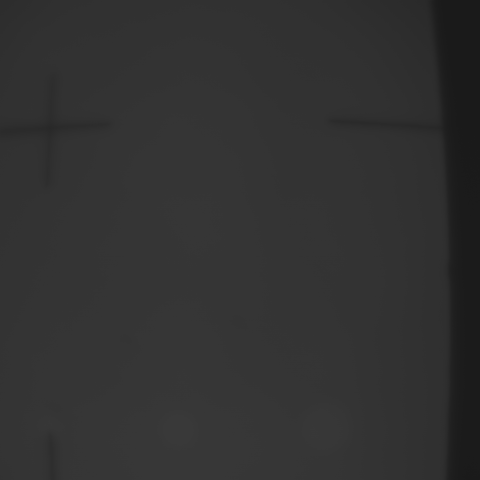

In [18]:
t15 = get_timage(60)
t15.show()

In [ ]:
исправить широкоугольное искажение
срастить секторы термограммы

In [2]:
t60 = get_timage(60)

In [3]:
t60[0,0], t60[1,0]

(43.934456, 43.10252)

In [4]:
t60[1,0], t60[1,1]

(43.10252, 43.435295)

In [7]:
t60[0.5,0.5]

43.684874534606934

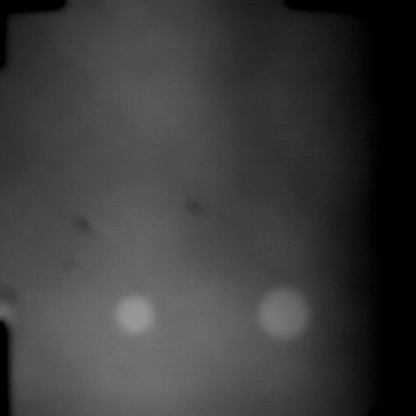

In [3]:
t60.show(contrast_level=0.94)

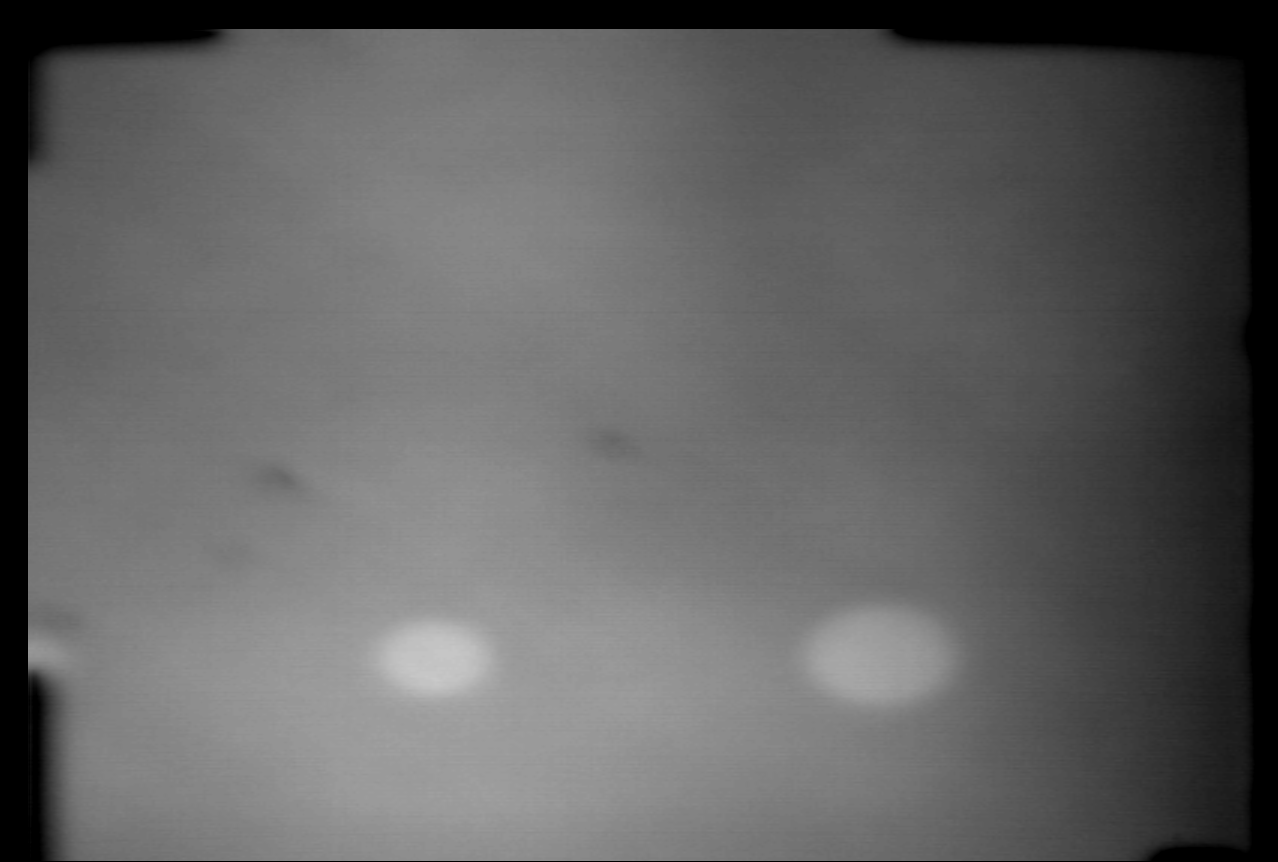

In [7]:
new = np.zeros((t60.array.shape[0]*2+30, t60.array.shape[1]*3+30), dtype=np.float32)

for i in range(len(new)):
    for j in range(len(new[0])):
        new[i][j] = t60[i/2-15, j/3-10]

Timage(array=new).show(contrast_level=0.94)